<center style="color:red;font-size:30px;font-family:courier">Prediction Of Energy Generation Using Machine Learning  </center>



<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Import Libraries</h1></center>


### Things to do:
### 1.Data Cleaning
### 2.Model Implementaion
### 3.prediction
### 4.Time series forcasting

In [151]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras import regularizers
from keras import callbacks


sns.set_style('darkgrid')
sns.set_palette('Set2')
print("Module Loaded")

Module Loaded


<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Import datasets</h1></center>


In [152]:
data=pd.read_excel("WTG01 Dataset.xlsx")
df=data.copy()

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Data Processing and cleaning</h1></center>


In [153]:
data.head()

,Local\nTime,MH-NMH-KHRI_03\nWTG01\nWind Direction Average\n°,MH-NMH-KHRI_03\nWTG01\nWind Speed Average\nm/s,MH-NMH-KHRI_03\nWTG01\nSeconds Grid Connection Absolute\nsec,MH-NMH-KHRI_03\nWTG01\nActive Power Average\nkW
0,2010-01-01 00:10:00,NaN,NaN,NaN,NaN
1,2010-01-01 00:20:00,NaN,NaN,NaN,NaN
2,2010-01-01 00:30:00,NaN,NaN,NaN,NaN
3,2010-01-01 00:40:00,NaN,NaN,NaN,NaN
4,2010-01-01 00:50:00,NaN,NaN,NaN,NaN


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709344 entries, 0 to 709343
Data columns (total 5 columns):
 #   Column                                                            Non-Null Count   Dtype         
---  ------                                                            --------------   -----         
 0   Local
Time                                                        709344 non-null  datetime64[ns]
 1   MH-NMH-KHRI_03
WTG01
Wind Direction Average
°                     685169 non-null  float64       
 2   MH-NMH-KHRI_03
WTG01
Wind Speed Average
m/s                       685169 non-null  float64       
 3   MH-NMH-KHRI_03
WTG01
Seconds Grid Connection Absolute
sec         687521 non-null  float64       
 4   MH-NMH-KHRI_03
WTG01
Active Power Average
kW                      685170 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 27.1 MB


In [155]:
data.describe()

,MH-NMH-KHRI_03\nWTG01\nWind Direction Average\n°,MH-NMH-KHRI_03\nWTG01\nWind Speed Average\nm/s,MH-NMH-KHRI_03\nWTG01\nSeconds Grid Connection Absolute\nsec,MH-NMH-KHRI_03\nWTG01\nActive Power Average\nkW
count,685169.000000,685169.000000,687521.000000,685170.000000
mean,0.767868,5.310678,352.511677,282.425820
std,28.582332,7.926609,282.180507,363.798576
min,-1000.000000,-1000.000000,0.000000,-221.000000
25%,-3.700000,3.600000,0.000000,0.000000
50%,0.300000,5.100000,600.000000,127.500000
75%,4.700000,6.900000,600.000000,456.575000
max,173.600000,21.000000,600.000000,1605.100000


In [156]:
data.isnull().sum()

Local\nTime                                                                0
MH-NMH-KHRI_03\nWTG01\nWind Direction Average\n°                       24175
MH-NMH-KHRI_03\nWTG01\nWind Speed Average\nm/s                         24175
MH-NMH-KHRI_03\nWTG01\nSeconds Grid Connection Absolute\nsec           21823
MH-NMH-KHRI_03\nWTG01\nActive Power Average\nkW                        24174
dtype: int64

In [157]:
data=data.dropna()

In [158]:
data.isnull().sum()

Local\nTime                                                            0
MH-NMH-KHRI_03\nWTG01\nWind Direction Average\n°                       0
MH-NMH-KHRI_03\nWTG01\nWind Speed Average\nm/s                         0
MH-NMH-KHRI_03\nWTG01\nSeconds Grid Connection Absolute\nsec           0
MH-NMH-KHRI_03\nWTG01\nActive Power Average\nkW                        0
dtype: int64

In [159]:
data.duplicated().sum()

0

In [160]:
data.shape

(684927, 5)

In [161]:
data.columns

Index(['Local\nTime',
       'MH-NMH-KHRI_03\nWTG01\nWind Direction Average\n°         ',
       'MH-NMH-KHRI_03\nWTG01\nWind Speed Average\nm/s       ',
       'MH-NMH-KHRI_03\nWTG01\nSeconds Grid Connection Absolute\nsec       ',
       'MH-NMH-KHRI_03\nWTG01\nActive Power Average\nkW        '],
      dtype='object')

In [162]:
data.columns=['Time','Directions','Average','grid','power']

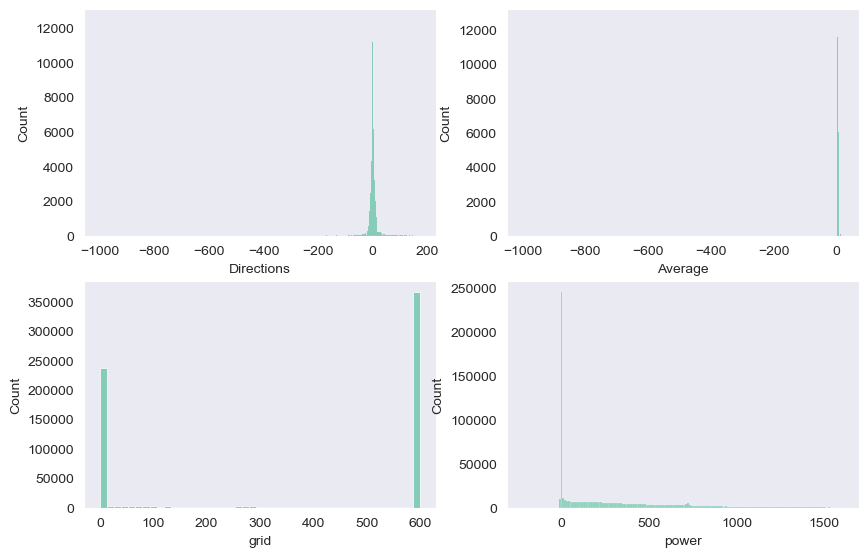

In [163]:
col_list=['Directions','Average','grid','power']
plt.figure(figsize=(10,10))
i=1
for col in col_list:
    plt.subplot(3,2,i)
    sns.histplot(data[col])
    plt.grid()
    i=i+1

In [164]:
data["Time"]=pd.to_datetime(data["Time"])

In [165]:
idata=data.set_index(data["Time"])

In [166]:
idata.head()

,Time,Directions,Average,grid,power
Time,,,,,
2010-01-08 00:00:00,2010-01-08 00:00:00,9.5,6.0,600.0,285.7
2010-01-08 00:10:00,2010-01-08 00:10:00,11.4,5.3,600.0,162.2
2010-01-08 00:20:00,2010-01-08 00:20:00,11.2,5.1,600.0,131.4
2010-01-08 00:30:00,2010-01-08 00:30:00,9.3,5.9,600.0,272.5
2010-01-08 00:40:00,2010-01-08 00:40:00,8.6,6.3,600.0,345.8


<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Exploratory Data Analysis</h1></center>


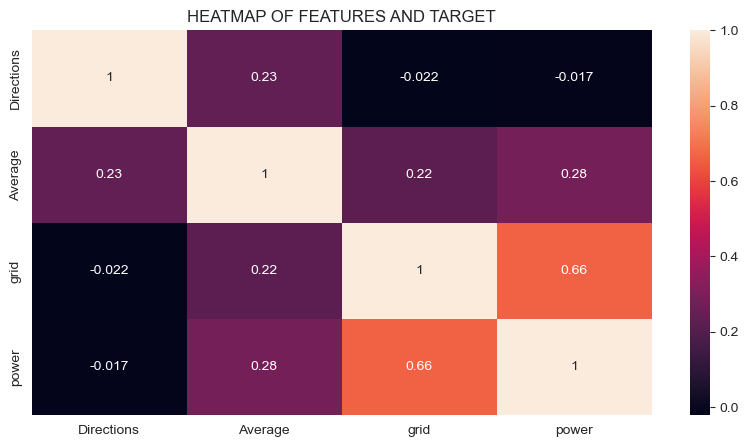

In [167]:
plt.figure(figsize=(10,5))
sns.heatmap(idata.corr(),annot=True)
plt.title("HEATMAP OF FEATURES AND TARGET")
plt.show()

### Grid have the highest linear relationship with target variable

In [168]:
idata.corr()["power"].sort_values(ascending=False)

power         1.000000
grid          0.661947
Average       0.282707
Directions   -0.017102
Name: power, dtype: float64

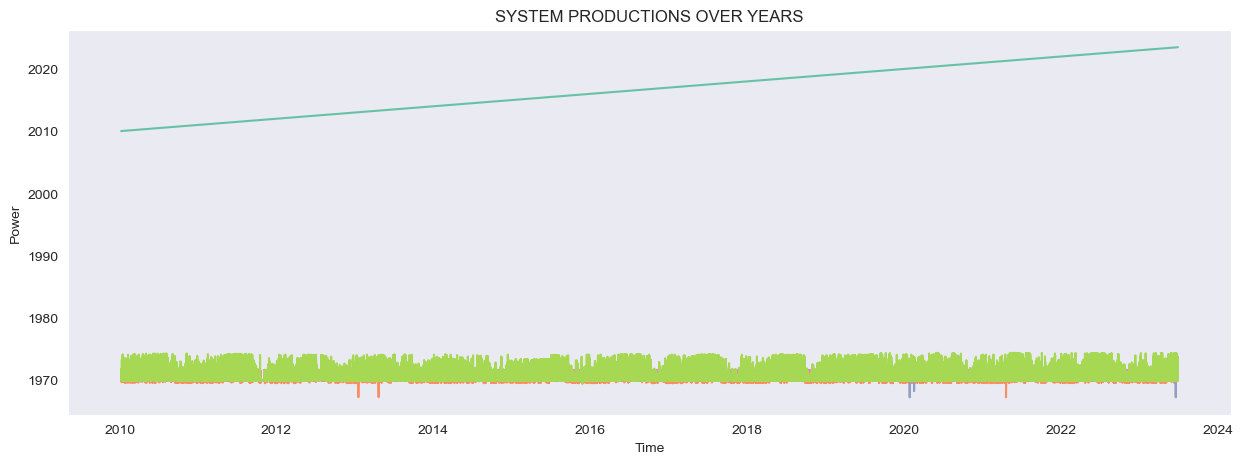

In [169]:
plt.figure(figsize=(15,5))
plt.xlabel('Time')
plt.ylabel('Power')
plt.plot(idata)
plt.title("SYSTEM PRODUCTIONS OVER YEARS")
plt.grid()
plt.show()

In [170]:
data['Date_day'] = data['Time'].dt.date
data['Month'] = data['Time'].dt.month
data['Day'] = data['Time'].dt.day
data['Hours'] = data['Time'].dt.hour
data['Year']=data["Time"].dt.year

data.head()

,Time,Directions,Average,grid,power,Date_day,Month,Day,Hours,Year
1007,2010-01-08 00:00:00,9.5,6.0,600.0,285.7,2010-01-08,1,8,0,2010
1008,2010-01-08 00:10:00,11.4,5.3,600.0,162.2,2010-01-08,1,8,0,2010
1009,2010-01-08 00:20:00,11.2,5.1,600.0,131.4,2010-01-08,1,8,0,2010
1010,2010-01-08 00:30:00,9.3,5.9,600.0,272.5,2010-01-08,1,8,0,2010
1011,2010-01-08 00:40:00,8.6,6.3,600.0,345.8,2010-01-08,1,8,0,2010


In [171]:
df_day = data.iloc[:,2:10].groupby(by='Date_day').mean()
df_day.head()

,Average,grid,power,Month,Day,Hours,Year
Date_day,,,,,,,
2010-01-08,4.875694,424.208333,206.375000,1.0,8.0,11.5,2010.0
2010-01-09,4.240278,349.381944,99.540972,1.0,9.0,11.5,2010.0
2010-01-10,4.178472,410.520833,78.328472,1.0,10.0,11.5,2010.0
2010-01-11,5.625694,534.354167,301.978472,1.0,11.0,11.5,2010.0
2010-01-12,4.279861,328.263889,226.545833,1.0,12.0,11.5,2010.0


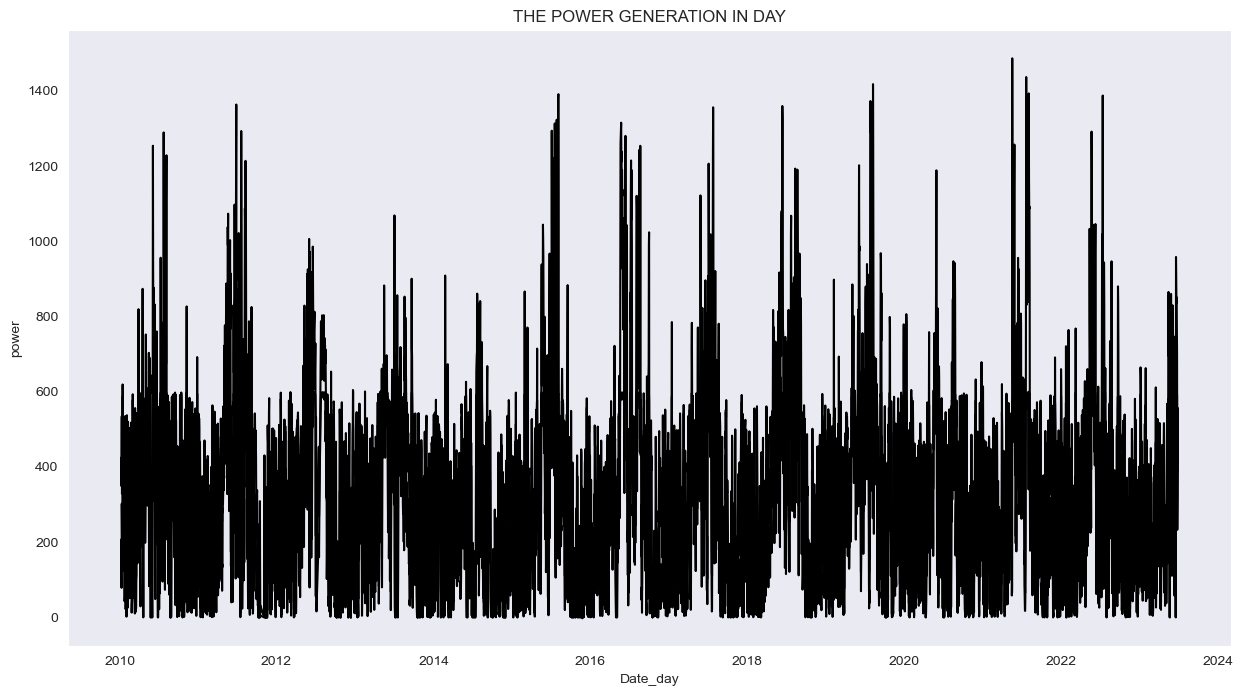

In [172]:
 #Daily plot
plt.figure(figsize = (15,8))
plt.grid()
plt.title("THE POWER GENERATION IN DAY")
daily = sns.lineplot(x='Date_day', y='power',data=df_day,color="black")
daily = sns.lineplot(x='Date_day', y='grid',data=df_day,color="black")

### Power generation in each day

In [173]:
data.groupby(by='Hours').mean()

,Directions,Average,grid,power,Month,Day,Year
Hours,,,,,,,
0,2.836150,5.246910,393.711285,260.337416,6.388072,15.679499,2016.323422
1,2.676213,5.369255,398.714713,279.756064,6.389543,15.677124,2016.325899
2,2.367991,5.475573,402.227989,299.943355,6.387307,15.681468,2016.327732
3,1.840886,5.559962,406.390168,317.226608,6.387042,15.682474,2016.327775
4,1.935549,5.599833,412.280751,326.170907,6.388638,15.679395,2016.328075
5,1.727419,5.600532,409.897555,327.194471,6.391279,15.693327,2016.326077
6,1.385394,5.608035,409.973551,329.439161,6.389908,15.684148,2016.325248
7,1.477919,5.595934,399.214442,330.932502,6.387040,15.697729,2016.322933
8,2.236897,5.530648,377.854940,330.903237,6.387628,15.698531,2016.323296


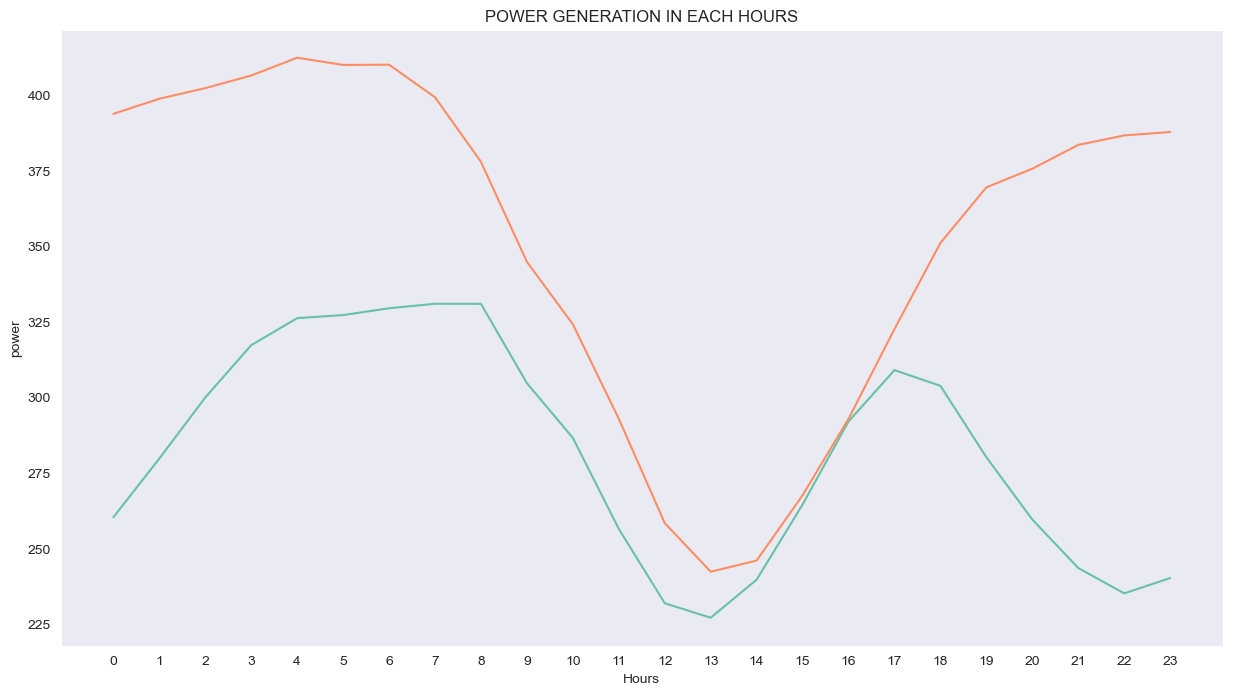

In [174]:
plt.figure(figsize = (15,8))
hourly = sns.lineplot(x='Hours', y='power',data=data.groupby(by='Hours').mean())
hourly = sns.lineplot(x='Hours', y='grid',data=data.groupby(by='Hours').mean())
hourly.set_xticks(range(len(data.groupby(by='Hours').mean())))
plt.title("POWER GENERATION IN EACH HOURS")
plt.grid()
#hourly.set_xticklabels(set(df['hours']))

### Mean Power generation for every hours.Maximum power is generated between 4 to 8 hours and minimum around 13 hours

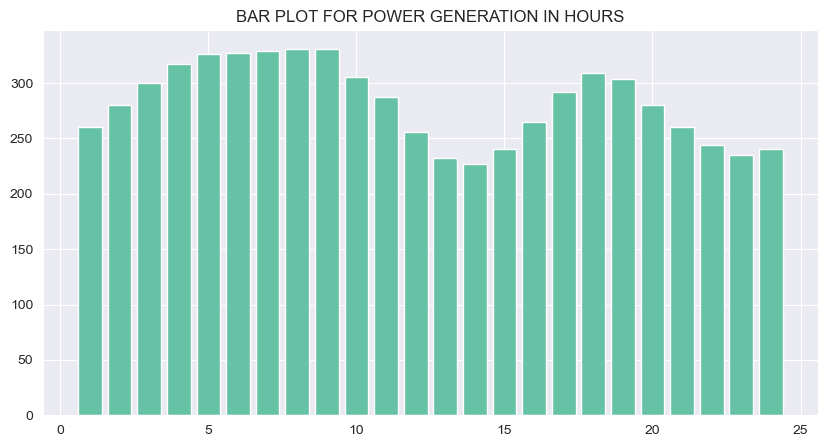

In [175]:
plt.figure(figsize=(10,5))
Hours_power=pd.DataFrame(data.groupby(by='Hours').mean())
Hours_power
p_hours=list(Hours_power['power'])
h_numbers=list(np.arange(1,25))
rounded_values = list(map(round, p_hours))             
plt.bar(h_numbers,rounded_values)
plt.title("BAR PLOT FOR POWER GENERATION IN HOURS")
plt.show()

In [176]:
# mean monthly production 
data.groupby(by='Month').mean()

,Directions,Average,grid,power,Day,Hours,Year
Month,,,,,,,
1,0.224692,4.289019,310.035649,194.855669,16.145853,11.476333,2016.606105
2,1.963094,4.420352,278.240342,165.926142,14.621121,11.488477,2016.483151
3,2.026098,4.628488,294.843534,181.536131,15.976529,11.464948,2016.482450
4,-0.389175,5.405872,372.225871,263.306305,15.498660,11.483066,2016.525111
5,-0.550752,7.102237,467.519270,506.880869,15.892701,11.475273,2016.546898
6,0.337141,6.524639,418.150164,466.275191,15.379107,11.455150,2016.590353
7,0.980131,7.028860,436.745522,505.907293,15.985936,11.504959,2016.240285
8,0.349487,6.575602,470.372706,465.327083,16.028678,11.482378,2016.051180
9,0.944051,5.039052,358.096444,228.211033,15.513525,11.498521,2015.987936


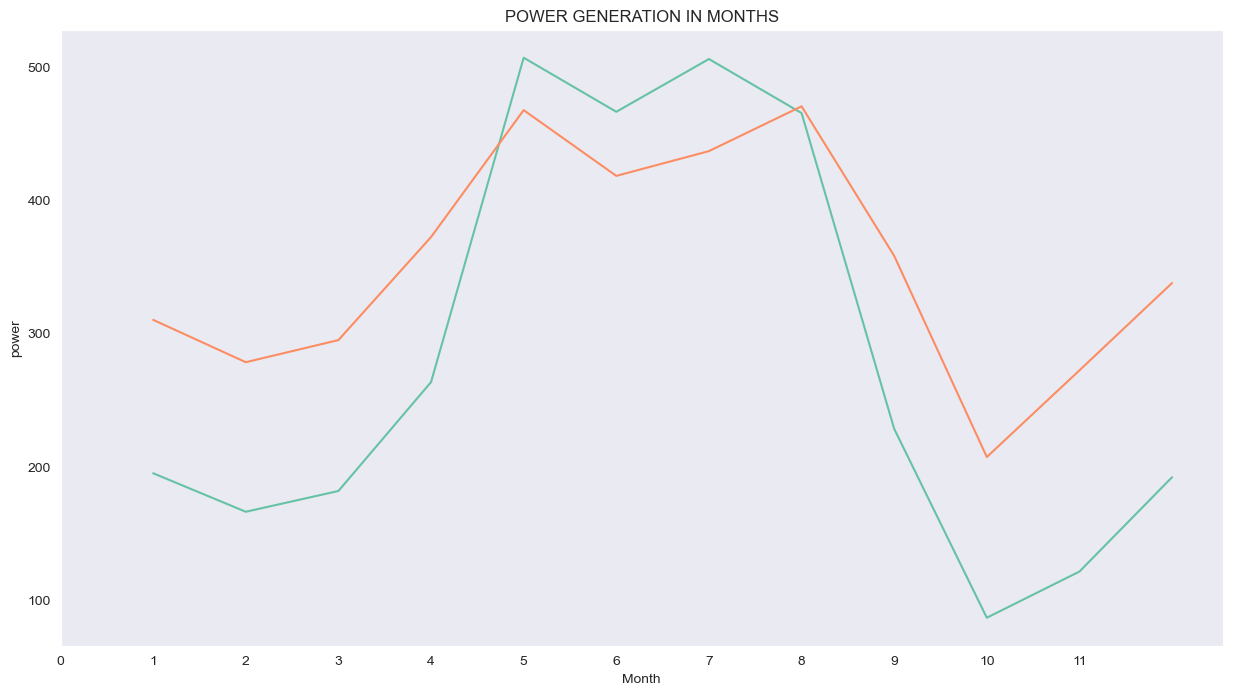

In [177]:
plt.figure(figsize = (15,8))
hourly = sns.lineplot(x='Month', y='power',data=data.groupby(by='Month').mean())
hourly = sns.lineplot(x='Month', y='grid',data=data.groupby(by='Month').mean())
hourly.set_xticks(range(len(data.groupby(by='Month').mean())))
plt.title("POWER GENERATION IN MONTHS")
plt.grid()
plt.show()

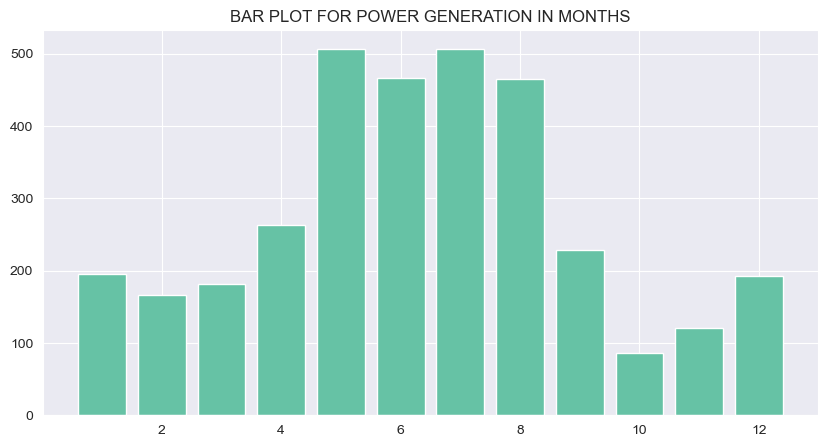

In [178]:
plt.figure(figsize=(10,5))
Month_power=pd.DataFrame(data.groupby(by='Month').mean())
Hours_power
p_hours=list(Month_power['power'])
h_numbers=list(np.arange(1,13))
rounded_values = list(map(round, p_hours))             
plt.bar(h_numbers,rounded_values)
plt.title("BAR PLOT FOR POWER GENERATION IN MONTHS")
plt.show()

### Maximum power generated between 6 to 8 months

In [179]:
data=data[['Time','Directions','Average','grid','power']]

In [180]:
data

,Time,Directions,Average,grid,power
1007,2010-01-08 00:00:00,9.5,6.0,600.0,285.7
1008,2010-01-08 00:10:00,11.4,5.3,600.0,162.2
1009,2010-01-08 00:20:00,11.2,5.1,600.0,131.4
1010,2010-01-08 00:30:00,9.3,5.9,600.0,272.5
1011,2010-01-08 00:40:00,8.6,6.3,600.0,345.8
...,...,...,...,...,...
709296,2023-06-27 16:10:00,3.9,5.9,0.0,0.0
709297,2023-06-27 16:20:00,4.4,6.4,0.0,0.0
709298,2023-06-27 16:30:00,-7.7,6.6,0.0,0.0
709299,2023-06-27 16:40:00,-5.5,6.6,0.0,-0.3


In [181]:
# Convert the 'datetime' column to a datetime data type
data['Time'] = pd.to_datetime(data['Time'])

# Define the start and end dates
start_date = pd.to_datetime('2016-01-01')
end_date = pd.to_datetime('2021-01-1')

# Select data between the start and end dates
selected_data = data[(data['Time'] >= start_date) & (data['Time'] <= end_date)]

In [182]:
selected_data=selected_data[['Directions','Average','grid','power']]

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Data Spilting And Model Training</h1></center>


In [183]:
# Train test split

# Dropped date column because we are using generated features for that.
X = selected_data.drop(["power"], axis=1)
y = selected_data["power"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

X.shape

(256597, 3)

In [184]:
X.head()

,Directions,Average,grid
315503,30.6,2.7,0.0
315504,32.4,2.9,0.0
315505,34.1,3.1,0.0
315506,38.0,3.5,0.0
315507,29.9,3.6,0.0


In [185]:
y.head()

315503    0.0
315504    0.0
315505    0.0
315506    0.0
315507   -1.0
Name: power, dtype: float64

<Figure size 1000x500 with 0 Axes>

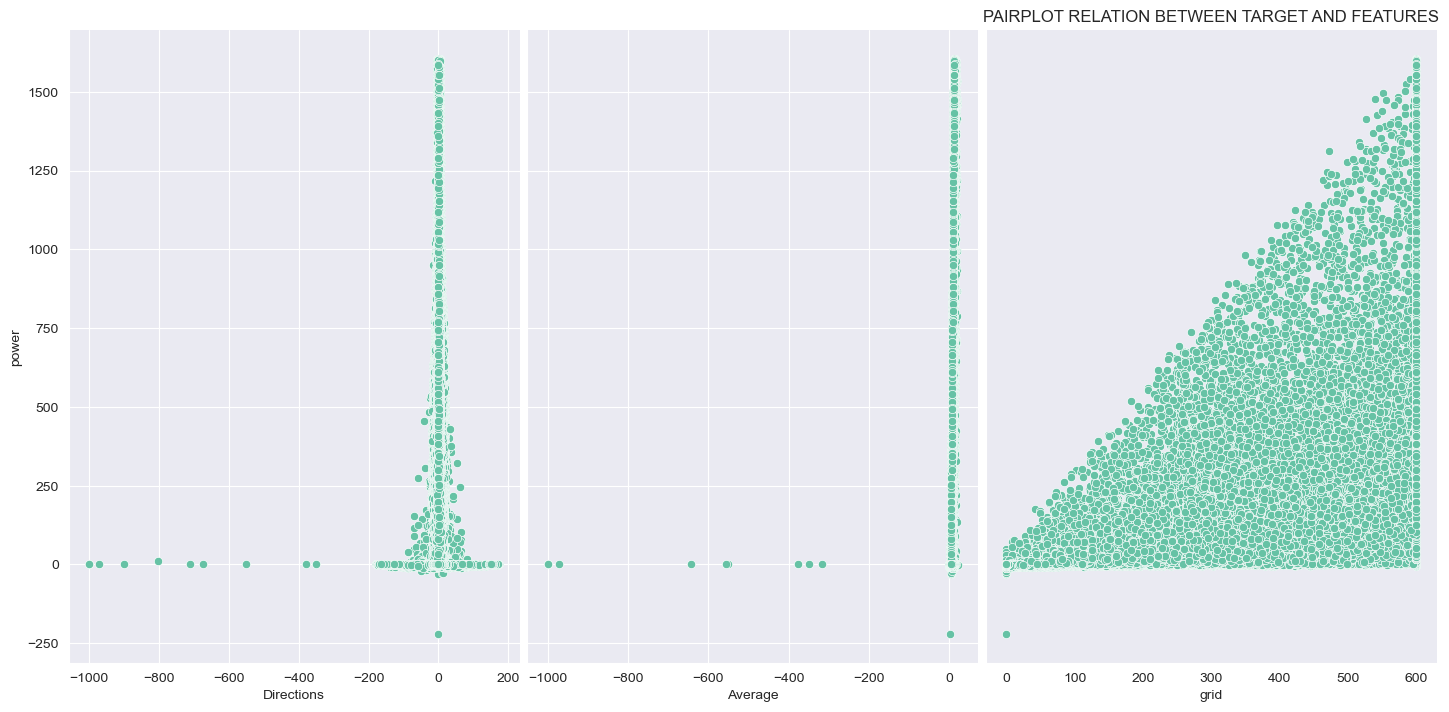

In [186]:
# Linearity
plt.figure(figsize=(10,5))
p = sns.pairplot(data, x_vars=['Directions','Average','grid'], y_vars='power', size=7, aspect=0.7)
plt.grid()
plt.title("PAIRPLOT RELATION BETWEEN TARGET AND FEATURES")
plt.show();

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Linear Regression</h1></center>


In [187]:
acu_list=[]

In [188]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
preds_lr = model_lr.predict(X_test)
print("Model Score",model_lr.score(X_test,y_test))
acu_list.append(model_lr.score(X_test,y_test))

Model Score 0.4407083000158869


In [189]:
def scores(y_test,preds):
#A function to calculate various scores depending on a given test series and prediction output.
#Metrics used: R2, RMSE, MAE, MAPE
    print(f"R2 score {round(r2_score(y_test,preds),2)}")
    print(f"RMSE score {round(np.math.sqrt(mean_squared_error(y_test,preds)),2)}")
    print(f"MAE score {round(mean_absolute_error(y_test,preds),2)}")
    print(f"MAPE score {round(mean_absolute_percentage_error(y_test,preds),2)}")

In [190]:
residuals = y_test.values-preds_lr
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.8222543885044993


In [191]:
scores(y_test,preds_lr)

R2 score 0.44
RMSE score 286.99
MAE score 191.33
MAPE score 2.7722110106514896e+16


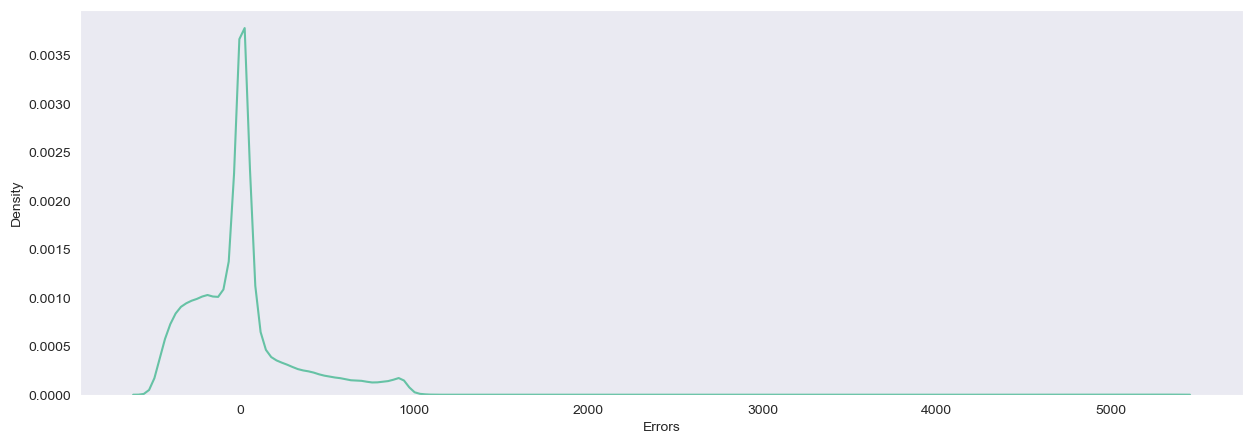

In [192]:
plt.figure(figsize=(15,5))
sns.kdeplot(residuals)
plt.xlabel("Errors")
plt.grid()
plt.show()

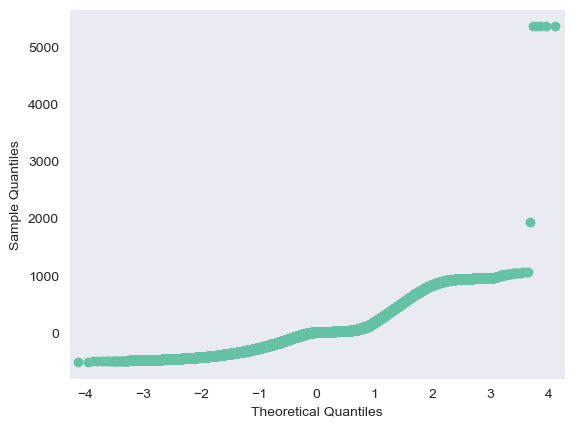

In [193]:
import statsmodels.api as sm
sm.qqplot(residuals)
plt.grid()
plt.show()

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Random Forest Regression</h1></center>


In [194]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
model_rf.fit(X_train, y_train.ravel())
preds_rf= model_rf.predict(X_test)

In [195]:
scores(y_test,preds_rf)

R2 score 1.0
RMSE score 26.8
MAE score 16.24
MAPE score 183778110442853.0


In [196]:
print("Model Accuracy",model_rf.score(X_test,y_test))

Model Accuracy 0.9951214173585355


In [197]:
acu_list.append(model_rf.score(X_test,y_test))

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Decsion Tree Regression</h1></center>


In [198]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state = 0)
model_dt.fit(X_train, y_train)
preds_dt= model_dt.predict(X_test)
print("Score",model_dt.score(X_test,y_test))

Score 0.9944118044359734


In [199]:
scores(y_test,preds_dt)

R2 score 0.99
RMSE score 28.69
MAE score 17.17
MAPE score 180214027657656.16


In [200]:
acu_list.append(model_dt.score(X_test,y_test))

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>KNneighbours  Regression</h1></center>

In [201]:
from sklearn.neighbors import KNeighborsRegressor
model_knn= KNeighborsRegressor(n_neighbors = 10)
model_knn.fit(X_train, y_train)
print("Model score",model_knn.score(X_test,y_test))

Model score 0.9930149298394891


In [202]:
preds_knn= model_knn.predict(X_test)

In [203]:
scores(y_test,preds_knn)

R2 score 0.99
RMSE score 32.07
MAE score 17.8
MAPE score 255623156480199.28


In [204]:
acu_list.append(model_knn.score(X_test,y_test))

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Gradient Boosting Regression</h1></center>

In [205]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GB.fit(X_train, y_train)
print("Model Score",model_knn.score(X_test,y_test))

Model Score 0.9930149298394891


In [206]:
preds_gb= GB.predict(X_test)

In [207]:
scores(y_test,preds_gb)

R2 score 0.96
RMSE score 75.3
MAE score 43.13
MAPE score 2.923638928890966e+16


In [208]:
acu_list.append(GB.score(X_test,y_test))

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Accuracy Bar Plot</h1></center>

In [209]:
acu_list

[0.4407083000158869,
 0.9951214173585355,
 0.9944118044359734,
 0.9930149298394891,
 0.9614988414242654]

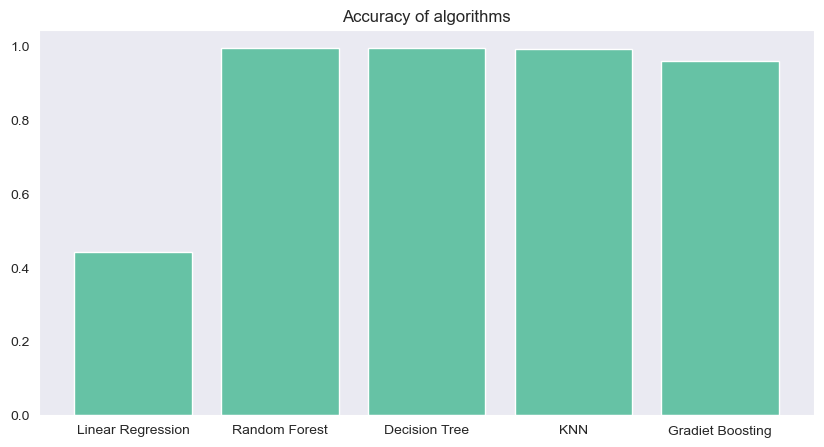

In [210]:
name_list=['Linear Regression','Random Forest',"Decision Tree",'KNN','Gradiet Boosting']
plt.figure(figsize=(10,5))
plt.bar(name_list,acu_list)
plt.title("Accuracy of algorithms")
plt.grid()
plt.show();

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Output Prediction</h1></center>

### Decison tree regressor ,KNneighbours and random forest have highet accuracy but time taken by KNneighbours is less than random forest .Future prediction we use KNneighbours Regression Algorithms.

In [242]:
# Convert the 'datetime' column to a datetime data type
data['Time'] = pd.to_datetime(data['Time'])

# Define the start and end dates
start_date = pd.to_datetime('2021-12-31 00:00:00')
end_date = pd.to_datetime('2022-12-31 00:00:00')

# Select data between the start and end dates
selected_data = data[(data['Time'] >= start_date) & (data['Time'] <= end_date)]
selected_data=selected_data[['Directions','Average','grid']]
selected_data

,Directions,Average,grid
631007,-1.6,6.5,600.0
631008,1.4,6.8,600.0
631009,0.5,7.5,600.0
631010,1.5,8.1,600.0
631011,2.8,8.8,600.0
...,...,...,...
683563,-1.3,6.5,600.0
683564,-2.1,6.8,600.0
683565,0.4,6.9,600.0
683566,2.0,7.1,600.0


In [243]:

pred=GB.predict(selected_data)

In [263]:
output=pd.DataFrame(pred)
output.columns=["Power"]
output

,Power
0,428.496275
1,455.996353
2,606.481741
3,702.746933
4,961.069933
...,...
51939,428.496275
51940,455.996353
51941,455.996353
51942,595.105532


In [264]:
start_datetime = '2022-01-01 00:00:00'
end_datetime = '2022-12-26 18:00:00'
df = pd.DataFrame({'datetime': pd.date_range(start=start_datetime, end=end_datetime, freq='10T')})

# Extract date and time components
df.shape

(51805, 1)

In [265]:
result = pd.concat([df, output[:-6]], ignore_index=True)
result

,datetime,Power
0,2022-01-01 00:00:00,NaN
1,2022-01-01 00:10:00,NaN
2,2022-01-01 00:20:00,NaN
3,2022-01-01 00:30:00,NaN
4,2022-01-01 00:40:00,NaN
...,...,...
103738,NaT,316.012218
103739,NaT,365.038700
103740,NaT,389.291923
103741,NaT,455.996353


In [267]:
file_path = r'C:\Users\ABC\Desktop\Data_science\result.xlsx'  # Specify the desired file path on your local laptop
result.to_excel(file_path, index=False)

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Time series forcasting</h1></center>

In [213]:
df.columns=['Time','Directions','Average','grid','power']
df=df.dropna()
df.head()

,Time,Directions,Average,grid,power
1007,2010-01-08 00:00:00,9.5,6.0,600.0,285.7
1008,2010-01-08 00:10:00,11.4,5.3,600.0,162.2
1009,2010-01-08 00:20:00,11.2,5.1,600.0,131.4
1010,2010-01-08 00:30:00,9.3,5.9,600.0,272.5
1011,2010-01-08 00:40:00,8.6,6.3,600.0,345.8


<AxesSubplot:>

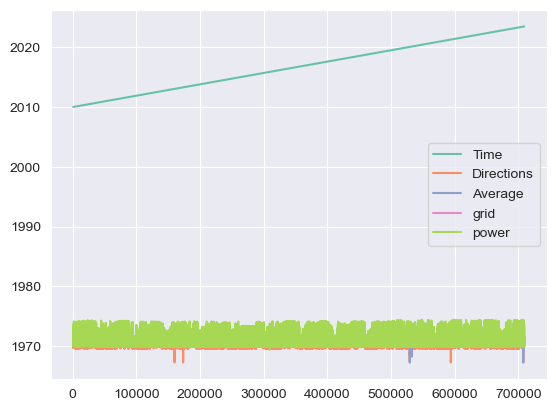

In [214]:
df.plot()

In [215]:
from statsmodels.tsa.stattools import adfuller
# Convert the 'datetime' column to a datetime data type
df['Time'] = pd.to_datetime(df['Time'])

# Define the start and end dates
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2022-01-1')

# Select data between the start and end dates
selected_data = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)]

In [216]:
test_result=adfuller(selected_data['power'])

In [217]:

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [218]:

adfuller_test(selected_data['power'])

ADF Test Statistic : -13.554570061408066
p-value : 2.373599083908611e-25
#Lags Used : 54
Number of Observations Used : 51772
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [219]:
selected_data['Sales First Difference'] = selected_data['power'] - selected_data['power'].shift(1)


In [220]:
selected_data['Seasonal First Difference']=selected_data['power']-selected_data['power'].shift(12)
selected_data.head(14)

,Time,Directions,Average,grid,power,Sales First Difference,Seasonal First Difference
578591,2021-01-01 00:00:00,1.9,10.3,600.0,1290.8,NaN,NaN
578592,2021-01-01 00:10:00,2.0,10.2,600.0,1253.9,-36.9,NaN
578593,2021-01-01 00:20:00,3.5,9.8,600.0,1145.9,-108.0,NaN
578594,2021-01-01 00:30:00,2.6,9.5,600.0,1097.9,-48.0,NaN
578595,2021-01-01 00:40:00,3.1,10.3,600.0,1253.1,155.2,NaN
578596,2021-01-01 00:50:00,2.8,10.5,600.0,1328.1,75.0,NaN
578597,2021-01-01 01:00:00,3.8,10.6,600.0,1329.1,1.0,NaN
578598,2021-01-01 01:10:00,1.6,10.6,600.0,1392.3,63.2,NaN
578599,2021-01-01 01:20:00,1.4,10.0,600.0,1244.1,-148.2,NaN
578600,2021-01-01 01:30:00,2.1,9.7,600.0,1145.3,-98.8,NaN


In [221]:
adfuller_test(selected_data['Seasonal First Difference'].dropna())

ADF Test Statistic : -41.084486021646065
p-value : 0.0
#Lags Used : 58
Number of Observations Used : 51756
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

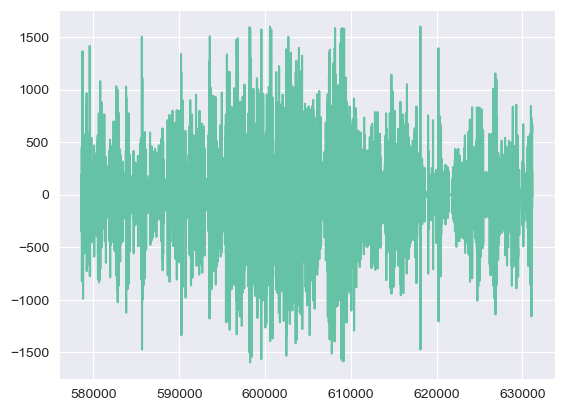

In [222]:
selected_data['Seasonal First Difference'].plot()

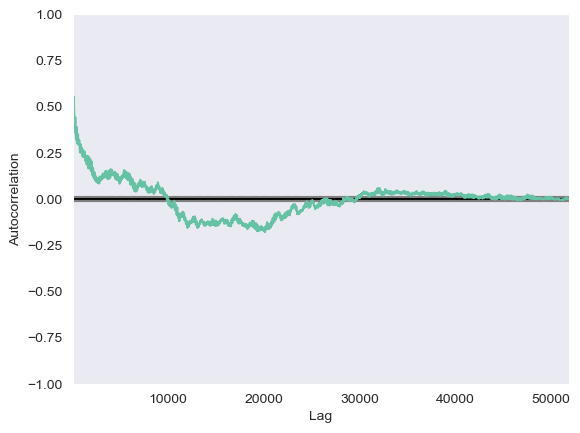

In [223]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already imported and prepared your selected_data DataFrame

# Use pandas.plotting instead of pandas.tools
from pandas.plotting import autocorrelation_plot

# Plot the autocorrelation
autocorrelation_plot(selected_data['power'])
plt.show()

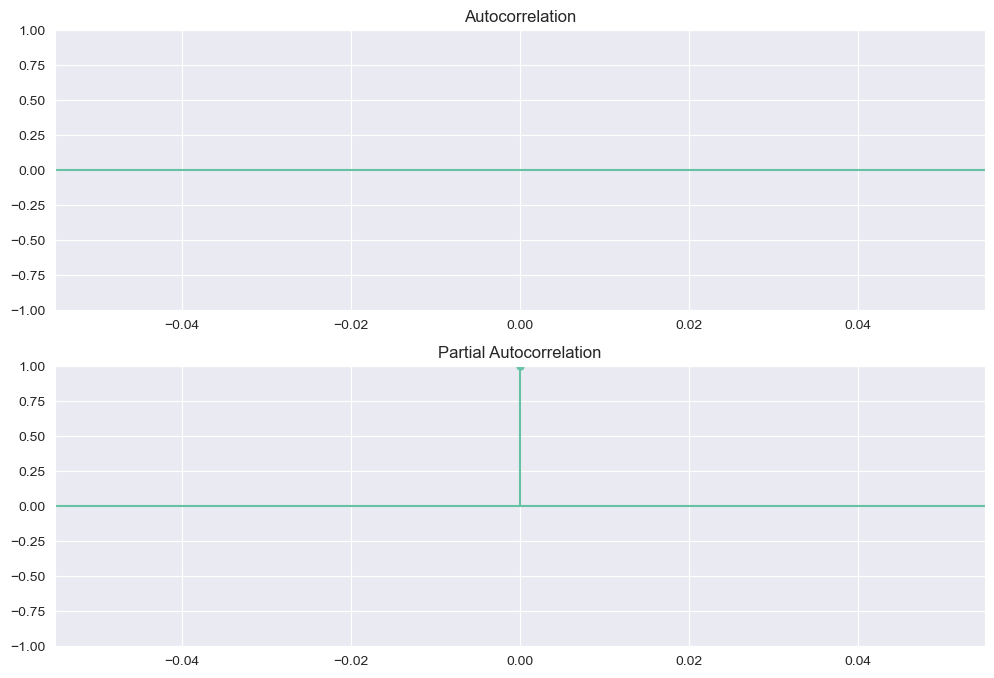

In [224]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(selected_data['Seasonal First Difference'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(selected_data['Seasonal First Difference'],lags=40,ax=ax2)

In [225]:
from statsmodels.tsa.arima_model import ARIMA

In [226]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have already imported and prepared your selected_data DataFrame

# Specify the order of the ARIMA model
order = (1, 1, 1)

# Create and fit the ARIMA model
model = sm.tsa.arima.ARIMA(selected_data['power'], order=order)
model_fit = model.fit()


In [227]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  power   No. Observations:                51827
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -319539.954
Date:                Mon, 17 Jul 2023   AIC                         639085.908
Time:                        11:26:32   BIC                         639112.475
Sample:                             0   HQIC                        639094.217
                              - 51827                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5937      0.005    111.681      0.000       0.583       0.604
ma.L1         -0.7874      0.004   -175.074      0.000      -0.796      -0.779
sigma2      1.327e+04     29.695    446.833      0.000    1.32e+04    1.33e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):            445682.09
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

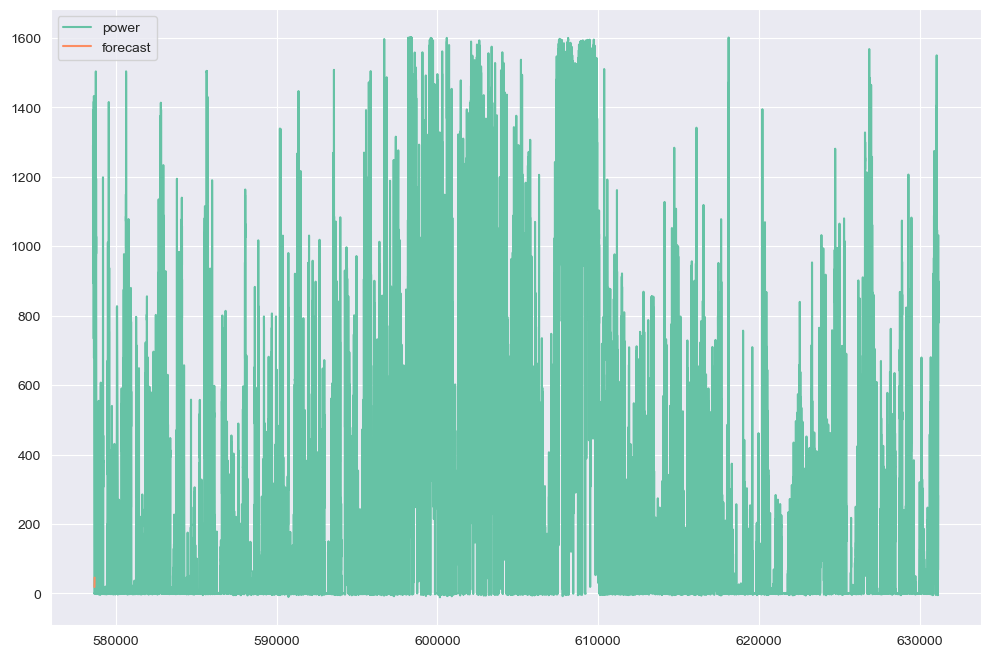

In [228]:
selected_data['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
selected_data[['power','forecast']].plot(figsize=(12,8))